TODO :
r=1, 1/2,1/3,1/4
ou alors on divise par 2 entre chaque (r/2)
on regarde la diff de valeur entre r et r/2
<= 1% de la valeur
plotter


à vérif en faisant des plots 

In [6]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()


svd =MangakiSVD(10)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)

Computing M: (1710 × 8347)
fill and center matrix [770 ms]
Shapes (1710, 10) (10,) (10, 8347)
factor matrix [28330 ms]


In [69]:

from scipy.spatial.distance import pdist, squareform

def compute_similarity_coisine(SVD):
    return 1 - squareform(pdist(SVD.T, metric='cosine'))

similarity=compute_similarity_coisine(svd.VT)


In [70]:
similarity

array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.08471437,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [-0.56138472, -0.07371975,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.14679545,  0.03701757, -0.03505325, ...,  1.        ,
         0.11731634, -0.00233954],
       [-0.68534132, -0.0280354 ,  0.09011494, ...,  0.11731634,
         1.        ,  0.05507686],
       [ 0.00383582,  0.91589537,  0.15850288, ..., -0.00233954,
         0.05507686,  1.        ]])

In [71]:
sampled_items=[ 929, 1126, 2483, 3511, 4460, 4858, 5163, 5340, 6674, 7700]
uniform_items=[2279, 5704, 8193, 1300, 6718, 3135, 1315, 7801, 472, 4580]

In [72]:
def diameter(r, nb_points):
    return ((2/(nb_points*(nb_points-1))*((pdist(svd.VT[:, sampled_items].T)**r).sum()))**(1/r))

In [73]:
diameter(1,10)

0.024841109005258488

In [74]:
nb_points=10
coefficient_sample=2/(nb_points*(nb_points-1))*(pdist(svd.VT[:,sampled_items].T).sum())
coefficient_sample

0.024841109005258488

<IPython.core.display.Javascript object>


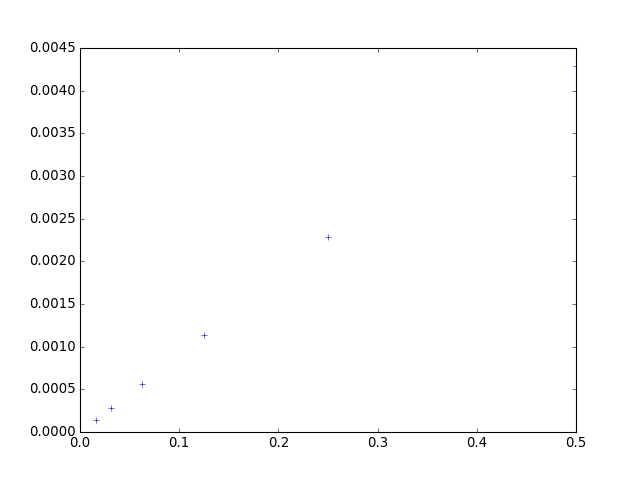

0.0248411090053

0.0205475322128

0.5
0.0205475322128

0.0182673543703

0.25
0.0182673543703

0.0171270945595

0.125
0.0171270945595

0.0165623894024

0.0625
0.0165623894024

0.0162821164774

0.03125
0.0162821164774

0.016142590715

0.015625


In [79]:
import matplotlib.pyplot as plt

%matplotlib notebook
plt.clf()


r=1
premier=diameter(r,10)
deuxième=diameter(r/2,10)
while premier-deuxième >0.01*deuxième :
    premier=diameter(r,10)
    r=r/2
    
    deuxième=diameter(r,10)
    print(premier)
    print()
    print(deuxième)
    print()
    print(r)
    plt.plot(r, premier-deuxième , '+b')
    

In [10]:
diameter(0.000000001,10)

0.016003505226748621

<IPython.core.display.Javascript object>


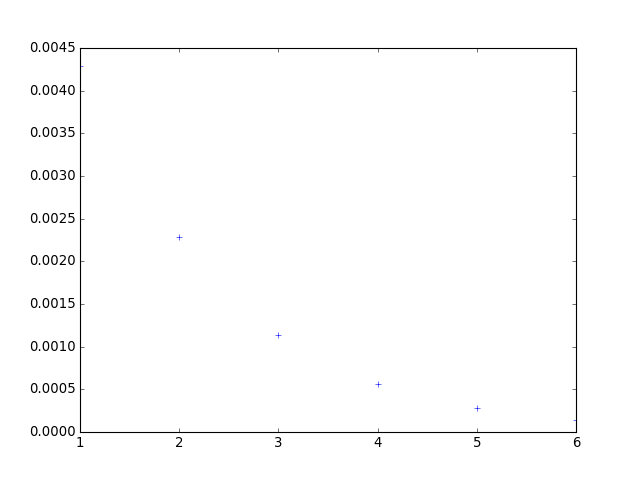

0.0248411090053

0.0205475322128

0.5
0.0205475322128

0.0182673543703

0.25
0.0182673543703

0.0171270945595

0.125
0.0171270945595

0.0165623894024

0.0625
0.0165623894024

0.0162821164774

0.03125
0.0162821164774

0.016142590715

0.015625


In [78]:
import matplotlib.pyplot as plt

%matplotlib notebook
plt.clf()

i=0
r=1
premier=diameter(1,10)
deuxième=diameter(1/2,10)
while premier-deuxième >0.01*premier :
    premier=diameter(r,10)
    r=r/2
    
    deuxième=diameter(r,10)
    print(premier)
    print()
    print(deuxième)
    print()
    print(r)
    i=i+1
    plt.plot(i, premier-deuxième , '+b')
    

In [80]:
def diameter(r, nb_points, items):
    return ((2/(nb_points*(nb_points-1))*((pdist(svd.VT[:, items].T)**r).sum()))**(1/r)) 

In [81]:
def diameter_0(nb_points, items):
    r=1
    premier=diameter(r,10, items)
    deuxième=diameter(r/2,10, items)
    while premier-deuxième >0.01*deuxième :
        premier=diameter(r,10, items)
        r=r/2
        deuxième=diameter(r,10, items)
    return deuxième



In [82]:
diameter_0(10, sampled_items)

0.016142590714989656

In [83]:
diameter_0(10, uniform_items)

0.024806839632745468

In [1]:
from sklearn.utils.extmath import randomized_svd
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import lil_matrix
from numpy.random import choice
from mangaki.utils.values import rating_values
from mangaki.models import Rating
import pandas
import random
import numpy as np


In [2]:


user_set, item_set = set(), set()
fname=None
if fname is None:
    content = Rating.objects.values_list('user_id',
                                                 'work_id',
                                                 'choice')
    for user_id, item_id in Rating.objects.values_list('user_id',
                                                               'work_id'):
        user_set.add(user_id)
        item_set.add(item_id)
else:
    content = pandas.read_csv(fname,
                                      header=None).as_matrix()
    for user_id, item_id in content[:, 0:2]:
        user_set.add(user_id)
        item_set.add(item_id)
user_dict = {v: k for k, v in enumerate(user_set)}
item_dict = {v: k for k, v in enumerate(item_set)}
matrix = lil_matrix((len(user_set), len(item_set)), dtype=np.float64)
for user_id, item_id, rating in content:
    matrix[user_dict[user_id],item_dict[item_id]] = rating_values[rating]

matrix.toarray()

array([[ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.]])

In [3]:
from scipy.sparse import csc_matrix

user_list, item_list, data=[],[], []


if fname is None:
    content = Rating.objects.values_list('user_id',
                                                 'work_id',
                                                 'choice')
    for user_id, item_id in Rating.objects.values_list('user_id',
                                                               'work_id'):
        user_list.append(user_id)
        item_list.append(item_id)
else:
    content = pandas.read_csv(fname,
                                      header=None).as_matrix()
    for user_id, item_id, choice in content:
        user_list.append(user_id)
        item_list.append(item_id)
        #data.append(rating_values[choice])
user_set=set(user_list)
item_set=set(item_list)
user_dict = {v: k for k, v in enumerate(user_set)}
item_dict = {v: k for k, v in enumerate(item_set)}
row=[user_dict[v] for v in user_list]
col=[item_dict[v] for v in item_list]
data=[rating_values[rating] for rating in Rating.objects.values_list('choice', flat=True)]
matrix = csc_matrix((data, (row, col)), shape=(len(user_set),len(item_set)))
matrix.toarray()
#matrix.toarray()

                    




array([[ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.]])

In [4]:
from scipy.sparse import csc_matrix

user_list, item_list, data=[],[], []


if fname is None:
    content = Rating.objects.values_list('user_id',
                                                 'work_id',
                                                 'choice')
    for user_id, item_id, choice in content:
        user_list.append(user_id)
        item_list.append(item_id)
        data.append(rating_values[choice])
else:
    content = pandas.read_csv(fname,
                                      header=None).as_matrix()
    for user_id, item_id, choice in content:
        user_list.append(user_id)
        item_list.append(item_id)
        data.append(rating_values[choice])
        
user_set=set(user_list)
item_set=set(item_list)
user_dict = {v: k for k, v in enumerate(user_set)}
item_dict = {v: k for k, v in enumerate(item_set)}
row=[user_dict[v] for v in user_list]
col=[item_dict[v] for v in item_list]
#data=[rating_values[rating] for rating in Rating.objects.values_list('choice', flat=True)]
matrix = csc_matrix((data, (row, col)), shape=(len(user_set),len(item_set)))
matrix.toarray()
#matrix.toarray()

array([[ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  2.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.]])

In [7]:
Rating.objects.values_list('user_id', 'work_id', 'choice')

[(2087, 1, 'like'), (1994, 2, 'willsee'), (1994, 3, 'neutral'), (1994, 5, 'favorite'), (1994, 16, 'favorite'), (1994, 22, 'neutral'), (1994, 30, 'like'), (1994, 37, 'dislike'), (1994, 40, 'like'), (1994, 49, 'like'), (1994, 55, 'favorite'), (1994, 65, 'neutral'), (1994, 87, 'neutral'), (1994, 91, 'like'), (1994, 122, 'like'), (1994, 141, 'favorite'), (1994, 13, 'willsee'), (1994, 60, 'like'), (1994, 26, 'willsee'), (1994, 8, 'wontsee'), '...(remaining elements truncated)...']

In [9]:
Rating.objects.values_list('work_id', 'user_id', 'choice').order_by('work_id', 'user_id')


[(1, 1900, 'like'), (1, 1901, 'like'), (1, 1903, 'like'), (1, 1905, 'like'), (1, 1906, 'like'), (1, 1907, 'like'), (1, 1908, 'favorite'), (1, 1910, 'like'), (1, 1911, 'wontsee'), (1, 1912, 'like'), (1, 1913, 'neutral'), (1, 1915, 'favorite'), (1, 1916, 'like'), (1, 1917, 'like'), (1, 1918, 'like'), (1, 1922, 'wontsee'), (1, 1923, 'like'), (1, 1924, 'like'), (1, 1925, 'like'), (1, 1928, 'neutral'), '...(remaining elements truncated)...']

In [26]:
for rating in Rating.objects.values('choice'):
    #print(rating)
    #data=rating_values[rating] 


SyntaxError: unexpected EOF while parsing (<ipython-input-26-981b25257f06>, line 3)

In [21]:
rating_values['like']

2

In [33]:
Rating.objects.values_list('choice', flat=True)


['like', 'willsee', 'neutral', 'favorite', 'favorite', 'neutral', 'like', 'dislike', 'like', 'like', 'favorite', 'neutral', 'neutral', 'like', 'like', 'favorite', 'willsee', 'like', 'willsee', 'wontsee', '...(remaining elements truncated)...']

In [11]:
row=[user_dict[v] for v in user_set]
col=[item_dict[v] for v in item_set]
#row


In [56]:
U, sigma, VT=randomized_svd(matrix,n_components=20)

In [58]:
VT
np.shape(VT)

(20, 4271)

In [66]:
def print_line(*args):
    for arg in args:
        print(arg)
    print(len(args))
    

In [12]:
print_line('a','b',3,45,'r','g')



NameError: name 'print_line' is not defined

In [1]:
Rating.objects.values_list('user_id','work_id','choice')

[(2087, 1, 'like'), (1994, 2, 'willsee'), (1994, 3, 'neutral'), (1994, 5, 'favorite'), (1994, 16, 'favorite'), (1994, 22, 'neutral'), (1994, 30, 'like'), (1994, 37, 'dislike'), (1994, 40, 'like'), (1994, 49, 'like'), (1994, 55, 'favorite'), (1994, 65, 'neutral'), (1994, 87, 'neutral'), (1994, 91, 'like'), (1994, 122, 'like'), (1994, 141, 'favorite'), (1994, 13, 'willsee'), (1994, 60, 'like'), (1994, 26, 'willsee'), (1994, 8, 'wontsee'), '...(remaining elements truncated)...']

In [1]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas 
from mangaki.utils.values import rating_values

ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()


svd =MangakiSVD(10)
X=ratings[:,0:2]
Y=[rating_values[rating] for rating in ratings[:,2]]
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)
svd.fit(X,Y)

Computing M: (1710 × 8347)
fill and center matrix [793 ms]
Shapes (1710, 10) (10,) (10, 8347)
factor matrix [27911 ms]


In [2]:
from scipy.spatial.distance import pdist, squareform

def compute_similarity_coisine(SVD):
    return 1 - squareform(pdist(SVD.T, metric='cosine'))

similarity=compute_similarity_coisine(svd.VT)


In [3]:
uniform_items=[2279, 5704, 8193, 1300, 6718, 3135, 1315, 7801, 472, 4580]

In [11]:
import numpy as np 
from scipy.spatial.distance import squareform, pdist




np.linalg.det(squareform(pdist(
                       svd.VT[:, uniform_items].T,
                       metric='cosine')))

-2.3777707907109327e-07

In [13]:
C=squareform(pdist(
                       svd.VT[:, uniform_items].T,
                       metric='cosine'))
np.shape(C)

(10, 10)

In [ ]:
np.linalg.det(similarity)

In [35]:
np.shape(similarity)
A=1-similarity
np.shape(A)
A=A[:,uniform_items]
A
np.shape(A)
D=A[uniform_items, :]
D
#np.shape(A)


array([[ 0.        ,  0.92494473,  1.40949884,  1.07620685,  1.05840657,
         0.91111015,  0.8624768 ,  0.92845639,  1.1169124 ,  0.51263919],
       [ 0.92494473,  0.        ,  1.40108378,  1.82938755,  1.00158655,
         0.54049524,  0.07418706,  0.88237594,  1.48164995,  1.13940186],
       [ 1.40949884,  1.40108378,  0.        ,  0.76639947,  0.6318404 ,
         0.71740293,  1.2041682 ,  0.46728672,  1.03059462,  1.02295045],
       [ 1.07620685,  1.82938755,  0.76639947,  0.        ,  0.85613574,
         1.34942295,  1.70138525,  1.15825754,  0.56629839,  1.04514834],
       [ 1.05840657,  1.00158655,  0.6318404 ,  0.85613574,  0.        ,
         0.31017759,  0.76671238,  0.22706116,  1.09668306,  1.20535903],
       [ 0.91111015,  0.54049524,  0.71740293,  1.34942295,  0.31017759,
         0.        ,  0.26604316,  0.08458483,  1.5872808 ,  1.03534168],
       [ 0.8624768 ,  0.07418706,  1.2041682 ,  1.70138525,  0.76671238,
         0.26604316,  0.        ,  0.57801132

In [33]:
A=(1-similarity)[:, uniform_items]
A=A[uniform_items, :]
A

array([[ 0.        ,  0.92494473,  1.40949884,  1.07620685,  1.05840657,
         0.91111015,  0.8624768 ,  0.92845639,  1.1169124 ,  0.51263919],
       [ 0.92494473,  0.        ,  1.40108378,  1.82938755,  1.00158655,
         0.54049524,  0.07418706,  0.88237594,  1.48164995,  1.13940186],
       [ 1.40949884,  1.40108378,  0.        ,  0.76639947,  0.6318404 ,
         0.71740293,  1.2041682 ,  0.46728672,  1.03059462,  1.02295045],
       [ 1.07620685,  1.82938755,  0.76639947,  0.        ,  0.85613574,
         1.34942295,  1.70138525,  1.15825754,  0.56629839,  1.04514834],
       [ 1.05840657,  1.00158655,  0.6318404 ,  0.85613574,  0.        ,
         0.31017759,  0.76671238,  0.22706116,  1.09668306,  1.20535903],
       [ 0.91111015,  0.54049524,  0.71740293,  1.34942295,  0.31017759,
         0.        ,  0.26604316,  0.08458483,  1.5872808 ,  1.03534168],
       [ 0.8624768 ,  0.07418706,  1.2041682 ,  1.70138525,  0.76671238,
         0.26604316,  0.        ,  0.57801132

In [8]:
A=(1-similarity)[uniform_items,uniform_items]
np.shape(A)
np.linalg.det(A[uniform_items, uniform_items])

IndexError: too many indices for array

In [23]:
B=squareform(pdist(
                       svd.VT[:, :10].T,
                       metric='cosine'))
np.shape(B)


(10, 10)

In [26]:
A == B

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]], dtype=bool)

In [34]:
np.linalg.det(A)

-2.3777707907109327e-07

In [37]:
np.linalg.det(D)


-2.3777707907109327e-07